In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Descargar el dataset (si no lo has hecho ya)
tfds.core.download.Resource(url="https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/d5652a28-c1d8-4b76-97f3-72fb80f94efc/file_downloaded")

# Cargar el dataset
datos, metadatos = tfds.load('plant_village', as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

In [ ]:
#Ver cuantos datos tengo en la variable
len(datos_entrenamiento)

27152

In [ ]:
#Imprimir los metadatos para revisarlos
metadatos

tfds.core.DatasetInfo(
    name='plant_village',
    full_name='plant_village/1.0.2',
    description="""
    The PlantVillage dataset consists of 54303 healthy and unhealthy leaf images
    divided into 38 categories by species and disease.
    
    NOTE: The original dataset is not available from the original source
    (plantvillage.org), therefore we get the unaugmented dataset from a paper that
    used that dataset and republished it. Moreover, we dropped images with
    Background_without_leaves label, because these were not present in the original
    dataset.
    
    Original paper URL: https://arxiv.org/abs/1511.08060 Dataset URL:
    https://data.mendeley.com/datasets/tywbtsjrjv/1
    """,
    homepage='https://arxiv.org/abs/1511.08060',
    data_dir='/root/tensorflow_datasets/plant_village/1.0.2',
    file_format=tfrecord,
    download_size=827.82 MiB,
    dataset_size=815.37 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
     

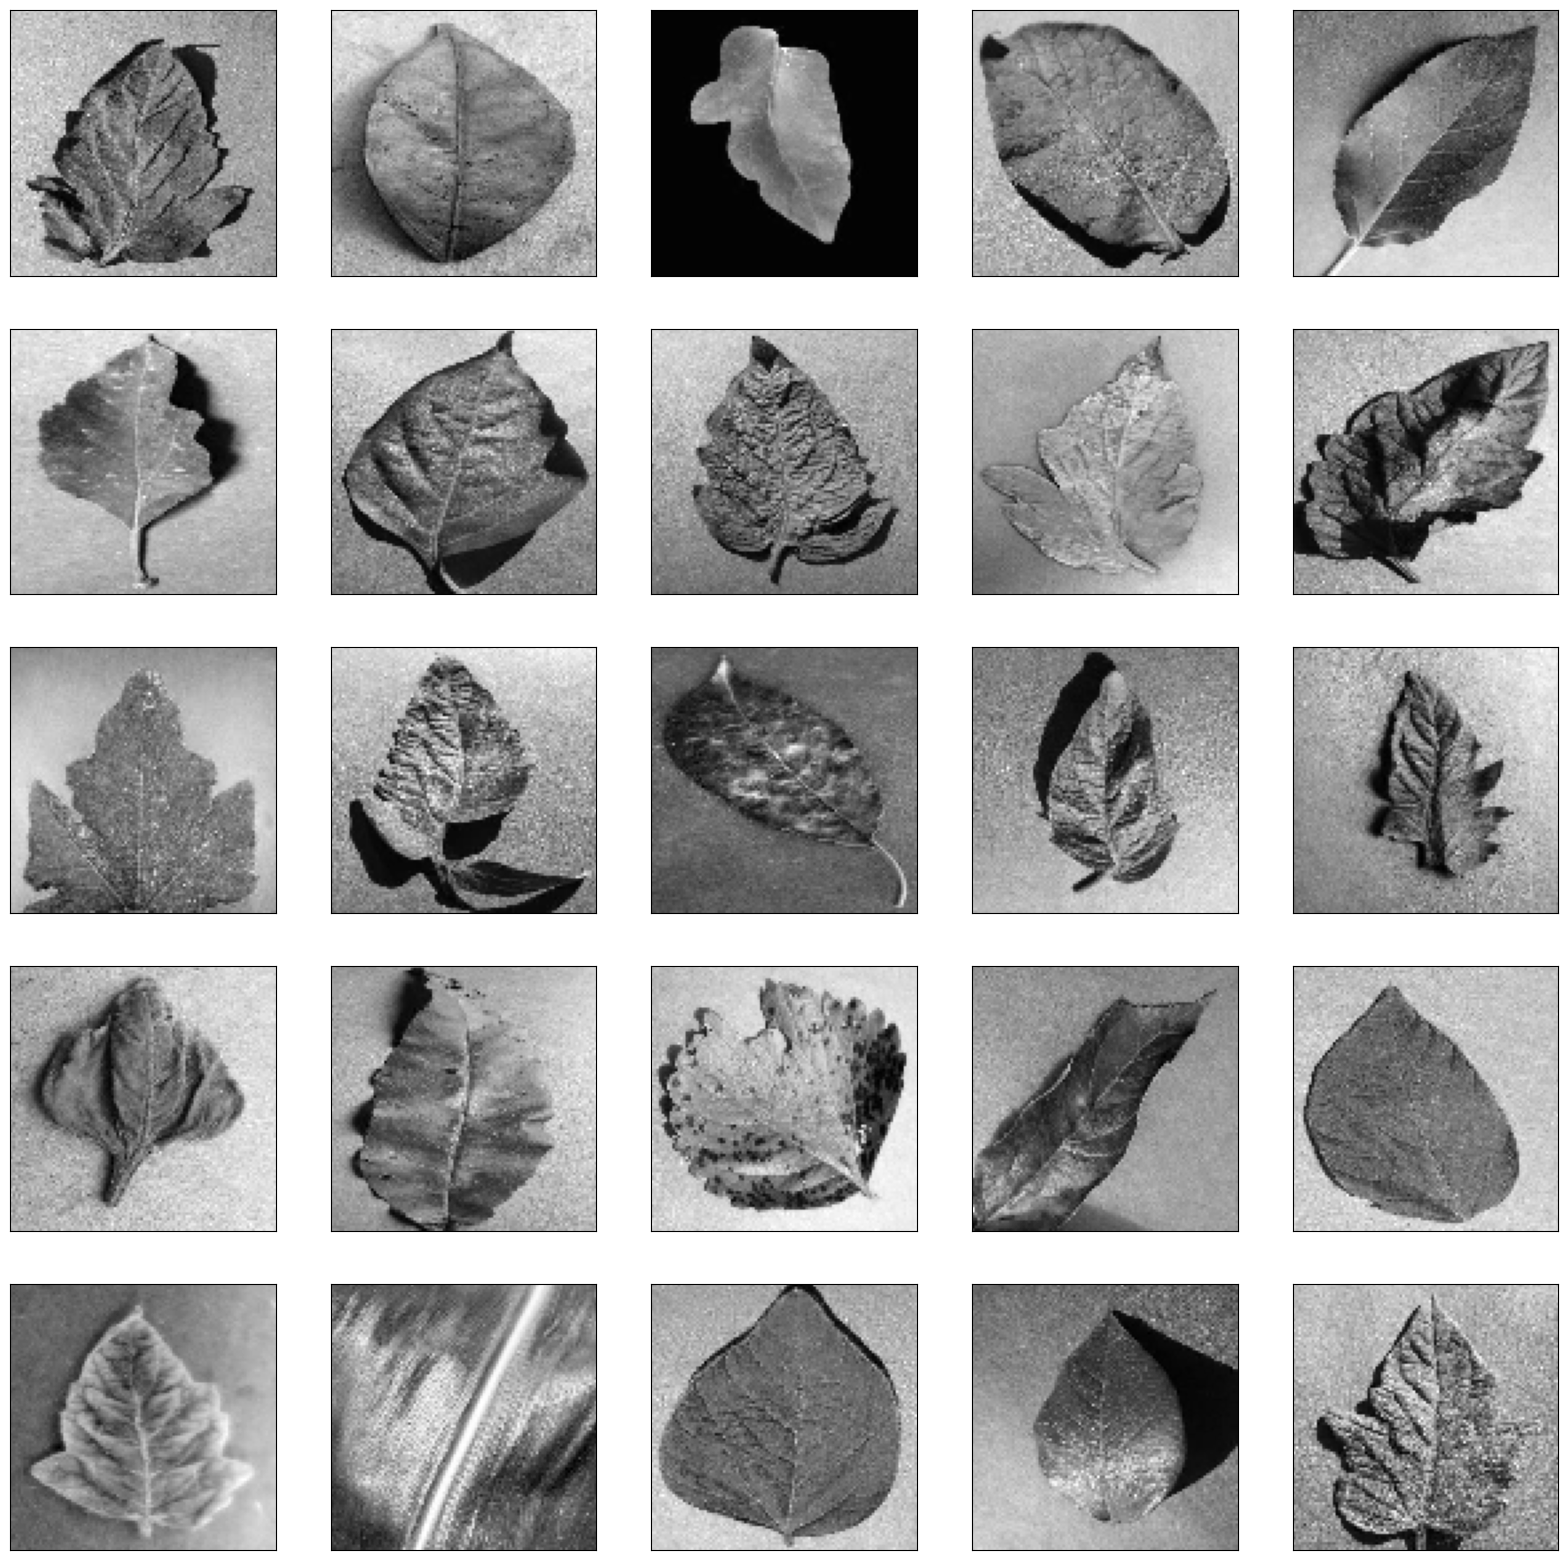

In [ ]:
import matplotlib.pyplot as plt
import cv2

plt.figure(figsize=(20,20))

TAMANO_IMG=100

for i, (imagen, etiqueta) in enumerate(datos['train'].take(25)):
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(imagen, cmap='gray')

In [ ]:
datos_entrenamiento = []

In [ ]:
#Manipular y visualizar el set
#Lo pasamos a TAMANO_IMG (100x100) y a blanco y negro (solo para visualizar)
for i, (imagen, etiqueta) in enumerate(datos['train']): #Todos los datos
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  imagen = imagen.reshape(TAMANO_IMG, TAMANO_IMG, 1) #Cambiar tamano a 100,100,1
  datos_entrenamiento.append([imagen, etiqueta])

In [ ]:
datos_entrenamiento[0]

[array([[[153],
         [157],
         [167],
         ...,
         [119],
         [107],
         [ 91]],
 
        [[153],
         [154],
         [158],
         ...,
         [122],
         [111],
         [113]],
 
        [[155],
         [146],
         [166],
         ...,
         [106],
         [114],
         [130]],
 
        ...,
 
        [[144],
         [179],
         [144],
         ...,
         [128],
         [125],
         [118]],
 
        [[153],
         [159],
         [175],
         ...,
         [145],
         [125],
         [126]],
 
        [[174],
         [163],
         [161],
         ...,
         [118],
         [115],
         [126]]], dtype=uint8),
 <tf.Tensor: shape=(), dtype=int64, numpy=35>]

In [ ]:
#Ver cuantos datos tengo en la variable
len(datos_entrenamiento)

54303

In [ ]:
#Preparar mis variables X (entradas) y y (etiquetas) separadas

X = [] #imagenes de entrada (pixeles)
y = [] #etiquetas (perro o gato)

for imagen, etiqueta in datos_entrenamiento:
  X.append(imagen)
  y.append(etiqueta)

In [ ]:
X

[array([[[153],
         [157],
         [167],
         ...,
         [119],
         [107],
         [ 91]],
 
        [[153],
         [154],
         [158],
         ...,
         [122],
         [111],
         [113]],
 
        [[155],
         [146],
         [166],
         ...,
         [106],
         [114],
         [130]],
 
        ...,
 
        [[144],
         [179],
         [144],
         ...,
         [128],
         [125],
         [118]],
 
        [[153],
         [159],
         [175],
         ...,
         [145],
         [125],
         [126]],
 
        [[174],
         [163],
         [161],
         ...,
         [118],
         [115],
         [126]]], dtype=uint8),
 array([[[134],
         [137],
         [136],
         ...,
         [132],
         [141],
         [138]],
 
        [[137],
         [138],
         [129],
         ...,
         [140],
         [134],
         [125]],
 
        [[122],
         [128],
         [128],
         ...,
      

In [ ]:
#Normalizar los datos de las X (imagenes). Se pasan a numero flotante y dividen entre 255 para quedar de 0-1 en lugar de 0-255
import numpy as np

X = np.array(X).astype(float) / 255

In [ ]:
y

[<tf.Tensor: shape=(), dtype=int64, numpy=35>,
 <tf.Tensor: shape=(), dtype=int64, numpy=15>,
 <tf.Tensor: shape=(), dtype=int64, numpy=31>,
 <tf.Tensor: shape=(), dtype=int64, numpy=20>,
 <tf.Tensor: shape=(), dtype=int64, numpy=3>,
 <tf.Tensor: shape=(), dtype=int64, numpy=2>,
 <tf.Tensor: shape=(), dtype=int64, numpy=19>,
 <tf.Tensor: shape=(), dtype=int64, numpy=34>,
 <tf.Tensor: shape=(), dtype=int64, numpy=28>,
 <tf.Tensor: shape=(), dtype=int64, numpy=31>,
 <tf.Tensor: shape=(), dtype=int64, numpy=25>,
 <tf.Tensor: shape=(), dtype=int64, numpy=30>,
 <tf.Tensor: shape=(), dtype=int64, numpy=6>,
 <tf.Tensor: shape=(), dtype=int64, numpy=34>,
 <tf.Tensor: shape=(), dtype=int64, numpy=36>,
 <tf.Tensor: shape=(), dtype=int64, numpy=37>,
 <tf.Tensor: shape=(), dtype=int64, numpy=16>,
 <tf.Tensor: shape=(), dtype=int64, numpy=27>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=24>,
 <tf.Tensor: shape=(), dtype=int64, numpy=37>,
 <tf.Tensor: shap

In [ ]:
#Convertir etiquetas en arreglo simple
y = np.array(y)

In [ ]:
X.shape

(54303, 100, 100, 1)

In [ ]:
#Crear los modelos iniciales
#Usan sigmoid como salida (en lugar de softmax) para mostrar como podria funcionar con dicha funcion de activacion.
#Sigmoid regresa siempre datos entre 0 y 1. Realizamos el entrenamiento para al final considerar que si la respuesta se
#acerca a 0 o 1

modeloDenso = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(100, 100, 1)),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

modeloCNN = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

modeloCNN2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
#Compilar modelos. Usar crossentropy binario ya que tenemos la opción de tiene o no tiene la enfermedad
modeloDenso.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN2.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
#La variable de tensorboard se envia en el arreglo de "callbacks" (hay otros tipos de callbacks soportados)
#En este caso guarda datos en la carpeta indicada en cada epoca, de manera que despues
#Tensorboard los lee para hacer graficas
tensorboardDenso = TensorBoard(log_dir='logs/denso')
modeloDenso.fit(X, y, batch_size=32,
                validation_split=0.15,
                epochs=100,
                callbacks=[tensorboardDenso])

In [ ]:
#Cargar la extension de tensorboard de colab
%load_ext tensorboard

In [ ]:
#Ejecutar tensorboard e indicarle que lea la carpeta "logs"
%tensorboard --logdir logs

In [ ]:
tensorboardCNN = TensorBoard(log_dir='logs/cnn')
modeloCNN.fit(X, y, batch_size=32,
                validation_split=0.15,
                epochs=100,
                callbacks=[tensorboardCNN])

In [ ]:
tensorboardCNN2 = TensorBoard(log_dir='logs/cnn2')
modeloCNN2.fit(X, y, batch_size=32,
                validation_split=0.15,
                epochs=100,
                callbacks=[tensorboardCNN2])

In [ ]:
#ver las imagenes de la variable X sin modificaciones por aumento de datos
plt.figure(figsize=(20, 8))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X[i].reshape(100, 100), cmap="gray")

In [ ]:
modeloDenso_AD = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(100, 100, 1)),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

modeloCNN_AD = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

modeloCNN2_AD = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
modeloDenso_AD.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN_AD.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN2_AD.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [ ]:
#Separar los datos de entrenamiento y los datos de pruebas en variables diferentes

len(X) * .85 #19700
len(X) - 19700 #3562

X_entrenamiento = X[:19700]
X_validacion = X[19700:]

y_entrenamiento = y[:19700]
y_validacion = y[19700:]

In [ ]:
#Usar la funcion flow del generador para crear un iterador que podamos enviar como entrenamiento a la funcion FIT del modelo
data_gen_entrenamiento = datagen.flow(X_entrenamiento, y_entrenamiento, batch_size=32)

In [ ]:
tensorboardDenso_AD = TensorBoard(log_dir='logs/denso_AD')

modeloDenso_AD.fit(
    data_gen_entrenamiento,
    epochs=100, batch_size=32,
    validation_data=(X_validacion, y_validacion),
    steps_per_epoch=int(np.ceil(len(X_entrenamiento) / float(32))),
    validation_steps=int(np.ceil(len(X_validacion) / float(32))),
    callbacks=[tensorboardDenso_AD]
)

In [ ]:
tensorboardCNN_AD = TensorBoard(log_dir='logs-new/cnn_AD')

modeloCNN_AD.fit(
    data_gen_entrenamiento,
    epochs=150, batch_size=32,
    validation_data=(X_validacion, y_validacion),
    steps_per_epoch=int(np.ceil(len(X_entrenamiento) / float(32))),
    validation_steps=int(np.ceil(len(X_validacion) / float(32))),
    callbacks=[tensorboardCNN_AD]
)

In [ ]:
tensorboardCNN2_AD = TensorBoard(log_dir='logs/cnn2_AD')

modeloCNN2_AD.fit(
    data_gen_entrenamiento,
    epochs=100, batch_size=32,
    validation_data=(X_validacion, y_validacion),
    steps_per_epoch=int(np.ceil(len(X_entrenamiento) / float(32))),
    validation_steps=int(np.ceil(len(X_validacion) / float(32))),
    callbacks=[tensorboardCNN2_AD]
)